# The causal impact of capital punishment upon murders
## Is anybody scared of the death penalty?

### Isaac Updike & Ryan Granet



## Write up draft


Methods :


## To Do: 

- look into lagging effects ($exec_{t-1}$)?

- describe methodology

- examine results

- compile more data on executions

We'd like to examine the causal effect of capital punishment on crime, specifically the murder rate. We accomplish this by compiling data

In [56]:
import ipystata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ipystata set up: 
###  replace stata location with your own & 
###  uncomment below 2 lines to set up ipystata in batch mode
#from ipystata.config import config_stata  
#config_stata('C:\Program Files\Stata16\StataIC-64', force_batch=True)

Load in execution data from [Death Penalty Information Center Exectuion Database](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDMoiJXVldahXzL4S037MGb7DgZMfeqfrR-zYtDJ_U-Sd6FS35W7WU_6N8pXBOm9NOBGIM8BEui37x/pub?gid=0&single=true&output=csv) to attempt to expand dataset


In [60]:
execution7712 = pd.read_stata('data/executions1977_2012.dta')
crime0412 = pd.read_excel('data/crime_04_12.xlsx')

executi

,State,County,FIPS_State,FIPS_County,violent_crime,murder,rape,robbery,assault,property,burglary,larceny,motor_thefts
0,Alabama,Autauga,1.0,1.0,49.0,0.0,4.0,9.0,36.0,380.0,129.0,211.0,40.0
1,Alabama,Baldwin,1.0,3.0,109.0,0.0,23.0,4.0,82.0,NaN,250.0,431.0,NaN
2,Alabama,Bibb,1.0,7.0,25.0,0.0,2.0,3.0,20.0,89.0,40.0,43.0,6.0
3,Alabama,Blount,1.0,9.0,101.0,2.0,12.0,2.0,85.0,1035.0,373.0,550.0,112.0
4,Alabama,Calhoun,1.0,15.0,25.0,0.0,6.0,12.0,7.0,682.0,175.0,506.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,NaN,Laramie,56.0,21.0,54.0,1.0,12.0,1.0,40.0,549.0,104.0,417.0,28.0
1070,NaN,Natrona,56.0,25.0,9.0,0.0,0.0,2.0,7.0,351.0,112.0,215.0,24.0
1071,NaN,1_Data_provided_for_nonmetropolitan_counties_a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,NaN,2_The_FBI_does_not_publish_arson_data_unless_i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
exs = pd.read_csv('data/dpic_exec.csv',usecols = list(range(14))) #

#change dates to datetime format
exs[['Execution Date']] = pd.to_datetime(
    exs.iloc[:,1], infer_datetime_format=True)

exs.rename(columns={"Execution Date": "date"}, inplace =True)
exs['execs'] = np.ones(exs.shape[0])

exs.head(4)

,Execution#,date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,County,Foreign National,Execution Method,Execution Volunteer,execs
0,1,1977-01-17,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,Utah County,Not a Foreign National,Firing Squad,Volunteer,1.0
1,2,1979-05-25,John,Spenkelink,NaN,NaN,White,Male,South,Florida,Leon County,Not a Foreign National,Electrocution,Not a Volunteer,1.0
2,3,1979-10-22,Jesse,Bishop,NaN,NaN,White,Male,West,Nevada,Clark County,Not a Foreign National,Gas,Volunteer,1.0
3,4,1981-03-09,Steven,Judy,NaN,NaN,White,Male,Midwest,Indiana,Morgan County,Not a Foreign National,Electrocution,Volunteer,1.0


total executinos: 1527.0


Text(0.5, 1.0, 'annual executions')

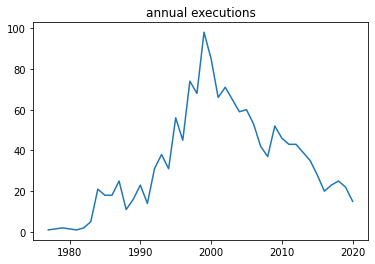

In [41]:
execbyyr = exs.groupby(exs.date.dt.year)['execs'].agg('sum')
print('total executinos:',sum(execbyyr))

plt.plot(execbyyr)
plt.title('Total annual executions')

In [9]:
df[['execs']].sum()

execs    256
dtype: int64

In [47]:
df = pd.read_stata('data/countymurders.dta')
df.head(4)

#df.statefips.unique().size #number of states in dataset (46)

,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,2.0,1001,54.049999,32216.0,20.629999,15.28,22.330000,40.250000,167.669998,8780.799805,29.160000,1980,2,0.620810,0.620809,1,1,0,10.380219,0.0
1,3.0,1001,53.660000,31984.0,20.190001,15.55,22.070000,40.360001,167.990005,8232.799805,43.919998,1981,1,0.312656,0.937969,1,1,0,10.372991,0.0
2,2.0,1001,53.750000,32036.0,19.660000,15.73,21.799999,40.419998,166.630005,8327.610352,71.410004,1982,3,0.936446,0.624298,1,1,0,10.374616,0.0
3,7.0,1001,53.779999,32056.0,19.100000,15.88,21.530001,40.470001,176.529999,8545.549805,72.220001,1983,7,2.183679,2.183679,1,1,0,10.375239,0.0


Send the dataframe to stata with the -d command 

Declare the it as panel data to stata with panel/time varibles

Use xtreg, fe to define a linear model using the fixed-effects estimator

In [48]:
%%stata -d df

xtset countyid year
xtreg murdrate density popul perc1019 perc2029 percblack percmale rpcincmaint rpcpersinc rpcunemins murders arrests arrestrate execs i.year, fe vce(robust)


       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit

Fixed-effects (within) regression               Number of obs     =     36,842
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.1627                                         min =          7
     between = 0.4637                                         avg =       16.8
     overall = 0.2468                                         max =         17

                                                F(29,2196)        =      17.09
corr(u_i, Xb)  = -0.3961                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,197 clusters in countyid)
------------------------------------------------------------------------------
             |               Robust
    murdrate |      Coef.   Std. Err.      t    P>|t|     

In [61]:
%%stata -d df

xtset countyid year
xtreg arrests density popul perc1019 perc2029 percblack percmale rpcincmaint rpcpersinc rpcunemins murders murdrate arrestrate l.execs i.year, fe vce(robust)


       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit

Fixed-effects (within) regression               Number of obs     =     34,767
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.2071                                         min =          7
     between = 0.1274                                         avg =       15.8
     overall = 0.1106                                         max =         16

                                                F(28,2196)        =      47.76
corr(u_i, Xb)  = -0.8516                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,197 clusters in countyid)
------------------------------------------------------------------------------
             |               Robust
     arrests |      Coef.   Std. Err.      t    P>|t|     